In [ ]:
import csv

with open('data-files/t-money.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    
    for row in reader:
        print(row)

In [14]:
# 유임승차 비율이 가장 높은 5개의 역을 찾으시오.
# 유무임 승차 인원이 가장 많은 5개의 역을 찾으시오.
#모든 역의 유무임 승하차 비율 

import csv

mx = 1000000000
mx_name = []
mx_data=[]

with open('data-files/t-money.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    
    for row in reader:
        try:
            mx_data = float(row[4])
            if mx_data > mx:
                mx = mx_data 
                mx_name = float(row[3])

SyntaxError: unexpected EOF while parsing (<ipython-input-14-75983692d1ea>, line 20)

In [18]:
# 유임승차 비율이 가장 높은 5개의 역을 찾으시오.
# 유무임 승차 인원이 가장 많은 5개의 역을 찾으시오.
#모든 역의 유무임 승하차 비율 

import csv

#str_to_int('1','2','3')   ->[1, 2, 3]
#str_to_int('1,000','2,000','3,000')   ->[1000, 2000, 3000]

def str_to_int(*args):    # * : 여러개를 넣을떄 리스트로 묶어주는~     
    results = []          #반목문 돌기
    if len(args) > 0:
        for arg in args:
            results.append(int(arg.replace(',', '')))     
            
    return results

In [20]:
str_to_int('1,000','2,000','3,000', '56' , '-12')    #여러개를 보낼때 하나로 묶어서 콤마(,)는 없애고 받을수 있다.

[1000, 2000, 3000, 56, -12]

In [21]:
with open('data-files/t-money.csv', encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    
    rates_by_station = {}              #명령 기준으로 계산하는 값을 넣음.
    
    for row in reader:
        #print(row[4], row[5])   # 여기서 프린트 할때는 [4]: 유임승차 [5]:유임하차 ..
        #변환한 results 에서는 [0]:유임승차, [1]:유임하차, [2]: 무임승차, [3]:무임하차
        results = str_to_int(row[4], row[5], row[6], row[7])
        rate1 = results[0] / ( results[0] + results[2] ) if results[0] + results[2] > 0 else -1    
        rate2 = results[1] / ( results[1] + results[3] ) if results[1] + results[3] > 0 else -1    
        rates_by_station[row[3]] = results + [round(rate1, 5), round(rate2, 5)]
        
#print(rates_by_station)

In [ ]:
#rates_by_station    #유임승차, 유임하차, 무임승차, 무임하차, 유임승차 비율, 무임하차 비율

In [31]:
sorted_rates = sorted(rates_by_station.items(),   #정렬할 기준 key와 value를 가져와 정렬
                      key=lambda kv: kv[1][0]+kv[1][2],    # 정렬 기준 kv[1][0]  ->이게[1번의[0번기준으로]] 정렬하겠다.
                      reverse=True)               #오름차순 / 내림차순 

In [32]:
#rates_by_station.items()
sorted_rates[:10] 

[('강남', [2010031, 2024007, 145213, 128063, 0.93262, 0.94049]),
 ('신림', [1484360, 1419570, 187519, 188294, 0.88784, 0.88289]),
 ('구로디지털단지', [1342972, 1339280, 135028, 135833, 0.90864, 0.90792]),
 ('서울대입구(관악구청)', [1086414, 1065344, 158038, 152879, 0.87301, 0.87451]),
 ('삼성(무역센터)', [1101158, 1134977, 89028, 82495, 0.9252, 0.93224]),
 ('역삼', [980725, 1099090, 130408, 131735, 0.88264, 0.89297]),
 ('영등포', [867045, 905453, 192731, 192231, 0.81814, 0.82488]),
 ('가산디지털단지', [946894, 947633, 73862, 69312, 0.92764, 0.93184]),
 ('양재(서초구청)', [790400, 865279, 118047, 119721, 0.87006, 0.87846]),
 ('수유(강북구청)', [732092, 717716, 169650, 168581, 0.81186, 0.80979])]

In [56]:
# 유임승차 비율이 가장 높은 5개의 역을 찾으시오.
# 유무임 승차 인원이 가장 많은 5개의 역을 찾으시오.
#모든 역의 유무임 승하차 비율 


#2개의 함수 먼저 만들고 시작함. 

def str_to_int(*args):    # * : 무엇이 들어갈지 몇개 들어갈지 알수없음. 여러개를 넣을떄 리스트로 묶어주는~     
    results = []          #반목문 돌기
    if len(args) > 0:      #
        for arg in args:
            results.append(int(arg.replace(',', '')))     
            
    return results

def add_list_by_element(list1, list2): 
    #add_list_by_elemen : 값1(Ture일때 값.) if 조건식 eles 값2(False일때 값)        /2개의 리스트를 받아서
    l, s = (list1, list2) if len(list1) >= len(list2) \
                            else (list2, list1)                    #2개의 리스트중 누가더 긴지 확인 해서 긴건 l에 해당. 짧은것 s
                         

    result = l.copy()                                          # 긴 리스트 복사해 가져와
    for idx, e in enumerate(s):                               #짧은 리스트 반복해서 합을 구함. (빈 곳은 0으로 진행.)
            result[idx] = s[idx] + l[idx]
            
    return result

In [54]:
with open('data-files/t-money.csv', encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    
    rates_by_station = {}
    
    for row in reader:
        #results [0]:유임승차, [1]:유임하차, [2]:무임승차, [3]:무임하차
        results = str_to_int(row[4], row[5], row[6], row[7])  #새로 들어온 값
        if row[3] in rates_by_station:  #이미 같은역 이름이 있다면
            prev_data = rates_by_station[row[3]]                #기존 등록된 값
            results = add_list_by_element(prev_data, results)       #누적된 값
           
        rate1 = results[0] / ( results[0] + results[2] ) if results[0] + results[2] > 0 else -1                  #누적된 값으로 rate를 가져온다.
        rate2 = results[1] / ( results[1] + results[3] ) if results[1] + results[3] > 0 else -1
        rates_by_station[row[3]] = results[:4] + [round(rate1, 5), round(rate2, 5)]            

sorted_rates = sorted(rates_by_station.items(),
                      key=lambda kv: kv[1][4],
                      #key=lambda kv: kv[1][0]+kv[1][2],    
                      reverse=True)             

In [55]:
#rates_by_station
sorted_rates[:20]

[('청라국제도시', [136124, 128405, 8596, 8547, 0.9406, 0.93759]),
 ('신논현', [716430, 733811, 46978, 44730, 0.93846, 0.94255]),
 ('홍대입구', [1440517, 1525232, 95456, 92530, 0.93785, 0.9428]),
 ('한양대', [161644, 178847, 11327, 11787, 0.93452, 0.93817]),
 ('강남', [2010031, 2024007, 145213, 128063, 0.93262, 0.94049]),
 ('여의도', [1017049, 1042139, 73661, 68849, 0.93247, 0.93803]),
 ('가산디지털단지', [1322470, 1391672, 101848, 101068, 0.92849, 0.93229]),
 ('마곡나루(서울식물원)', [377856, 368354, 29499, 29070, 0.92758, 0.92685]),
 ('삼성(무역센터)', [1101158, 1134977, 89028, 82495, 0.9252, 0.93224]),
 ('한강진', [154970, 186142, 12718, 12623, 0.92416, 0.93649]),
 ('광화문(세종문화회관)', [661603, 697401, 55172, 53443, 0.92303, 0.92882]),
 ('합정', [1016300, 1060671, 88006, 85183, 0.92031, 0.92566]),
 ('신사', [690416, 748596, 60137, 57972, 0.91988, 0.92813]),
 ('여의나루', [257613, 266305, 23117, 21738, 0.91765, 0.92453]),
 ('압구정로데오', [381632, 443842, 34275, 33448, 0.91759, 0.92992]),
 ('검암', [164047, 160701, 15265, 15342, 0.91487, 0.91285]),


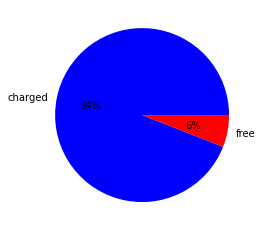

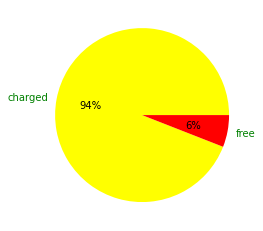

In [69]:
import matplotlib.pyplot as plt

first = sorted_rates[0] 
plt.pie([first[1][4], 1-first[1][4]],
        labels=['charged','free'],
        colors=['blue', 'red'],
        autopct = '%1.f%%')     # autopct = 비율을 보여줌.

plt.show()

import matplotlib.pyplot as plt

first = sorted_rates[0] 
_, texts, _ = plt.pie([first[1][4], 1-first[1][4]],
                        labels=['charged','free'],
                        colors=['yellow', 'red'],
                        autopct = '%1.f%%')     # autopct = 비율을 보여줌.
for t in texts:
    t.set_color('green')  # 텍스트
    
plt.savefig(first[0] + '.png')     #시각화한 표를 사진 파일로 저장.
plt.show()